## Approximating Contours and Convex Hull 

***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


Original Image


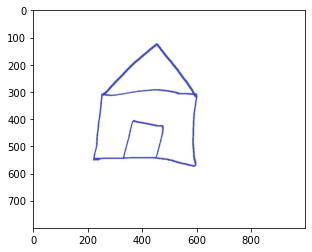

Bounding Rectangle


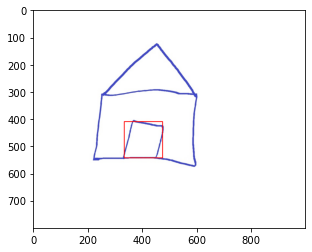

Bounding Rectangle


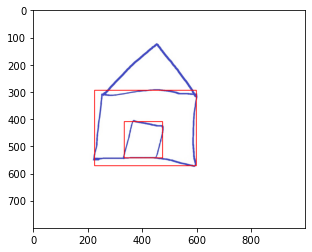

Bounding Rectangle


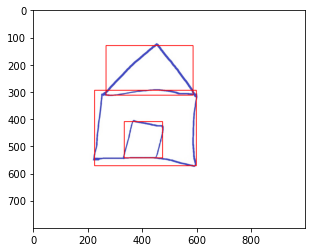

Bounding Rectangle


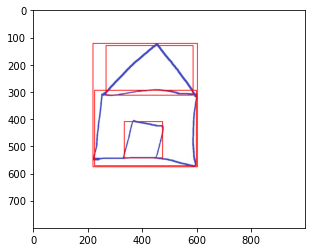

Approx Poly DP


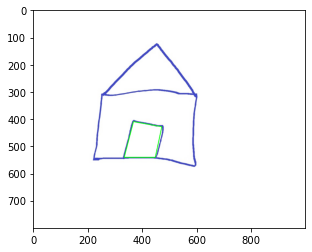

Approx Poly DP


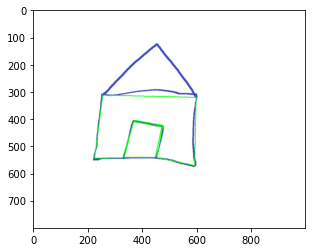

Approx Poly DP


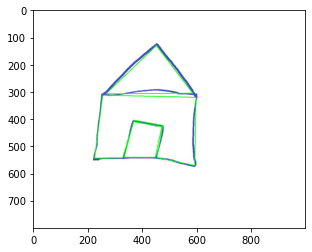

Approx Poly DP


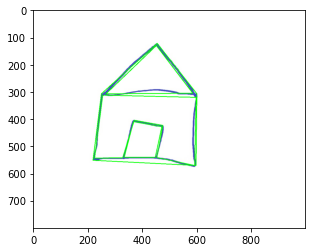

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from show import show
# Load image and keep a copy
image = cv2.imread('images/house.jpg')
orig_image = image.copy()
cv2.imshow('Original Image', orig_image)
show('Original Image', orig_image)
cv2.waitKey(0) 

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    cv2.imshow('Bounding Rectangle', orig_image)
    show('Bounding Rectangle', orig_image)

cv2.waitKey(0) 
    
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.imshow('Approx Poly DP', image)
    show('Approx Poly DP', image)
    
cv2.waitKey(0)   
cv2.destroyAllWindows()

## Convex Hull



Original Image


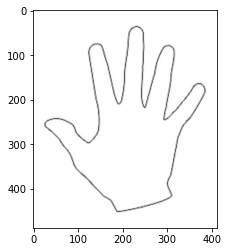

Convex Hull


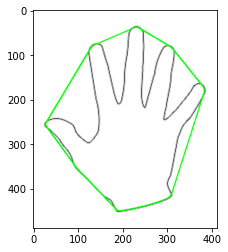

Convex Hull


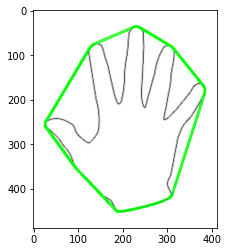

In [2]:
import numpy as np
import cv2

image = cv2.imread('images/hand.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original Image', image)
show('Original Image', image)
cv2.waitKey(0) 

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
#The -1 ignores the contour of the whole image
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    cv2.imshow('Convex Hull', image)
    show('Convex Hull', image)

cv2.waitKey(0)    
cv2.destroyAllWindows()